In [2]:
# ✅ Upload the automobile.csv you downloaded
from google.colab import files
uploaded = files.upload()

import pandas as pd

df_auto = pd.read_csv('automobile.csv')
print(df_auto.shape)
df_auto.head()


Saving automobile.csv to automobile (1).csv
(2, 26)


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,164.0,audi,gas,turbo,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,16500


In [3]:
# ✅ 1) Check for missing values
print(df_auto.isnull().sum())

# ✅ 2) Drop rows where 'price' is missing (target variable)
df_auto = df_auto.dropna(subset=['price'])

# ✅ 3) Fill missing numeric features with mean
numeric_cols = df_auto.select_dtypes(include=['float64', 'int64']).columns
df_auto[numeric_cols] = df_auto[numeric_cols].fillna(df_auto[numeric_cols].mean())

# ✅ 4) Fill missing categorical with mode
categorical_cols = df_auto.select_dtypes(include=['object']).columns
df_auto[categorical_cols] = df_auto[categorical_cols].fillna(df_auto[categorical_cols].mode().iloc[0])

# ✅ 5) Confirm no missing values
print(df_auto.isnull().sum())


symboling            0
normalized_losses    1
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64
symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          

In [4]:
# ✅ Encode categorical variables with one-hot encoding
df_auto_encoded = pd.get_dummies(df_auto, drop_first=True)

print("Encoded shape:", df_auto_encoded.shape)

# ✅ Features & Target
X = df_auto_encoded.drop('price', axis=1)
y = df_auto_encoded['price']

# ✅ Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Encoded shape: (2, 22)
Train shape: (1, 21)
Test shape: (1, 21)


In [5]:
from sklearn.linear_model import LinearRegression

# ✅ Create & train model
lr = LinearRegression()
lr.fit(X_train, y_train)

# ✅ Coefficients
print("Intercept:", lr.intercept_)
print("Number of coefficients:", len(lr.coef_))


Intercept: 13495.0
Number of coefficients: 21


In [6]:
from sklearn.metrics import mean_squared_error, r2_score

# ✅ Predict on test set
y_pred = lr.predict(X_test)

# ✅ Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")


MSE: 9030025.00
RMSE: 3005.00
R2 Score: nan


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


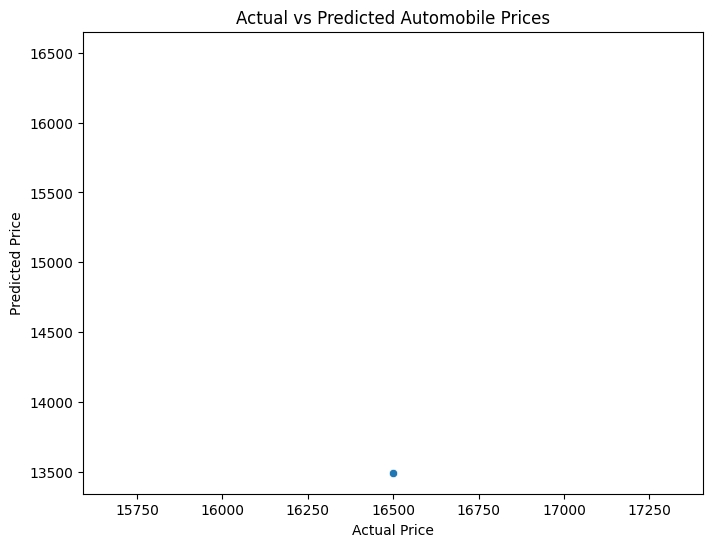

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Scatter plot of Actual vs Predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Automobile Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line y=x
plt.show()


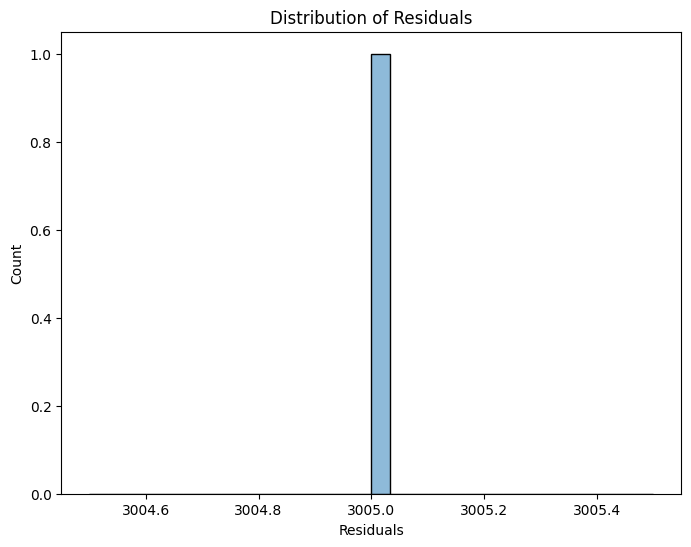

In [8]:
# ✅ Residuals
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()
